# ATTRITION PREDICTION

##### Importing necessary librairies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the dataset

In [2]:
df = pd.read_excel(r"C:\Users\damil\Downloads\HR_Analysis Dataset.xlsx")

In [3]:
#to display all the columns
pd.set_option('display.max_columns', None)

### Overview of the dataset

In [4]:
df.shape

(1480, 34)

In [5]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,No,13,3,3,80,0,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,No,12,3,1,80,0,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Yes,14,3,4,80,0,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,No,15,3,4,80,0,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,No,12,3,4,80,0,3,0,0,0,0.0


### Descriptive summary

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,2.724324,65.845270,2.729730,2.064865,2.725000,6504.985811,14298.460811,2.687162,15.210135,3.153378,2.708784,80.0,11.281757,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,1.092579,20.328266,0.713007,1.105574,1.104137,4700.261400,7112.056802,2.494098,3.655338,0.360474,1.081995,0.0,7.770870,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,8051.000000,1.000000,12.000000,3.000000,2.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4933.000000,14220.000000,2.000000,14.000000,3.000000,3.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,8383.750000,20460.500000,4.000000,18.000000,3.000000,4.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EnvironmentSatisfaction   1480 non-null   int64  
 12  Gender                    1480 non-null   object 
 13  HourlyRate                1480 non-null   int64  
 14  JobInvol

### Data cleaning and preprocessing

##### Checking the missing values in the dataframe

In [9]:
df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
TotalWorkingYears            0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSin

##### We can see from above that only *YearsWithCurrManager* contains missing values 

##### filtering rows in the dataframe where *YearsWithCurrManager* has missing values

In [10]:
df[df["YearsWithCurrManager"].isnull()]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
28,RM024,21,18-25,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,3,Male,96,3,1,Research Scientist,4,Single,1232,Upto 5k,19281,1,No,14,3,4,80,0,3,0,0,0,NaN
31,RM363,21,18-25,No,Non-Travel,895,Sales,9,2,Medical,1,1,Male,39,3,1,Sales Representative,4,Single,2610,Upto 5k,2851,1,No,24,4,3,80,3,2,3,2,2,NaN
45,RM207,22,18-25,No,Travel_Rarely,1136,Research & Development,5,3,Life Sciences,1,4,Male,60,4,1,Research Scientist,2,Divorced,2328,Upto 5k,12392,1,Yes,16,3,1,80,4,2,4,2,2,NaN
99,RM139,25,18-25,No,Travel_Rarely,959,Sales,28,3,Life Sciences,1,1,Male,41,2,2,Sales Executive,3,Married,8639,5k-10k,24835,2,No,18,3,4,80,6,3,2,2,2,NaN
100,RM256,25,18-25,No,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,1,Female,62,3,2,Manufacturing Director,3,Married,4898,Upto 5k,7505,0,No,12,3,4,80,5,3,4,2,1,NaN
103,RM406,25,18-25,Yes,Travel_Rarely,688,Research & Development,3,3,Medical,1,1,Male,91,3,1,Laboratory Technician,1,Married,4031,Upto 5k,9396,5,No,13,3,3,80,6,3,2,2,0,NaN
222,RM405,28,26-35,No,Travel_Rarely,1300,Research & Development,17,2,Medical,1,3,Male,79,3,2,Laboratory Technician,1,Divorced,4558,Upto 5k,13535,1,No,12,3,4,80,10,3,10,0,1,NaN
262,RM072,29,26-35,No,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,3,Male,76,3,1,Research Scientist,2,Married,2703,Upto 5k,4956,0,No,23,4,4,80,6,3,5,4,0,NaN
264,RM206,29,26-35,Yes,Travel_Rarely,121,Sales,27,3,Marketing,1,2,Female,35,3,3,Sales Executive,4,Married,7639,5k-10k,24525,1,No,22,4,4,80,10,2,10,4,1,NaN
268,RM253,29,26-35,No,Travel_Rarely,665,Research & Development,15,3,Life Sciences,1,3,Male,60,3,1,Research Scientist,4,Single,2340,Upto 5k,22673,1,No,19,3,1,80,6,3,6,5,1,NaN


##### To get the department present in the *Department* column

In [11]:
df['Department'].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

##### Filtering the dataframe to include only the rows where:
1. The value in the “YearsAtCompany” column is between 10 and 20 (inclusive).
2. The value in the “Department” column is “Research & Development”.

In [12]:
df[((df['YearsAtCompany'] >= 10) & (df['YearsAtCompany'] <= 20)) & (df['Department'] == 'Research & Development')]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
222,RM405,28,26-35,No,Travel_Rarely,1300,Research & Development,17,2,Medical,1,3,Male,79,3,2,Laboratory Technician,1,Divorced,4558,Upto 5k,13535,1,No,12,3,4,80,10,3,10,0,1,NaN
230,RM781,28,26-35,Yes,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,2,Male,72,2,3,Healthcare Representative,1,Single,8722,5k-10k,12355,1,No,12,3,1,80,10,2,10,7,1,9.0
261,RM016,29,26-35,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,2,Female,51,4,3,Manufacturing Director,1,Divorced,9980,5k-10k,10195,1,No,11,3,3,80,10,3,10,9,8,8.0
263,RM156,29,26-35,No,Non-Travel,1496,Research & Development,1,1,Technical Degree,1,4,Male,41,3,2,Manufacturing Director,3,Married,4319,Upto 5k,26283,1,No,13,3,1,80,10,3,10,7,0,9.0
277,RM421,29,26-35,No,Travel_Rarely,986,Research & Development,3,4,Medical,1,2,Male,93,2,3,Research Director,3,Married,11935,10k-15k,21526,1,No,18,3,3,80,10,3,10,2,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,RM977,56,55+,No,Travel_Rarely,1369,Research & Development,23,3,Life Sciences,1,4,Male,68,3,4,Manufacturing Director,2,Married,13402,10k-15k,18235,4,Yes,12,3,1,80,33,3,19,16,15,9.0
1445,RM1442,56,55+,No,Non-Travel,667,Research & Development,1,4,Life Sciences,1,3,Male,57,3,2,Healthcare Representative,3,Divorced,6306,5k-10k,26236,1,No,21,4,1,80,13,2,13,12,1,9.0
1446,RM1445,56,55+,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,4,Male,72,3,1,Laboratory Technician,3,Married,2339,Upto 5k,3666,8,No,11,3,4,80,14,1,10,9,9,8.0
1450,RM1054,57,55+,No,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,2,Male,93,4,2,Research Scientist,3,Married,4900,Upto 5k,2721,0,No,24,4,1,80,13,2,12,9,2,8.0


From the above result, we can observe the following trend between *YearsWithCurrManager* and *YearsAtCompany*:

- Employees who have been with the company for a longer period (10 to 20 years) tend to have a significant number of years with their current manager.
- There is a noticeable variation in the *YearsWithCurrManager* values, indicating that some employees have had the same manager for almost their entire tenure, while others have had changes in management.

##### Calculating the correlation matrix to see the relationship between *YearsWithCurrManager* and other years related column

In [13]:
selected_columns = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

correlation_matrix = df[selected_columns].corr()

In [14]:
correlation_matrix

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
YearsAtCompany,1.000000,0.758964,0.619236,0.764294
YearsInCurrentRole,0.758964,1.000000,0.548418,0.714728
YearsSinceLastPromotion,0.619236,0.548418,1.000000,0.512005
YearsWithCurrManager,0.764294,0.714728,0.512005,1.000000


- *YearsWithCurrManage* has a Stronger positive correlation with *YearsAtCompany* compared to other columns

- Employees who have been with the company longer (YearsAtCompany) tend to have been in their current role (YearsInCurrentRole) and with their current manager (YearsWithCurrManager) for a longer period.

- There is a moderate correlation between the time since the last promotion (YearsSinceLastPromotion) and the other variables, indicating that employees who have been with the company longer or in their current role longer are somewhat likely to have gone longer without a promotion.

##### The function *fill_missing_years_with_curr_manager* is designed to fill in missing values in a specified column (in this case, *YearsWithCurrManager*) based on the mean values calculated for different ranges of *YearsAtCompany* and for each department.

In [15]:
def fill_missing_years_with_curr_manager(df, column_with_missing):
    # Define ranges for YearsAtCompany and corresponding departments
    ranges = [
        (0, 3),
        (3, 10),
        (10, 20),
        (20, 30),
        (30, 40)
    ]
    departments = df['Department'].unique()
    
    for department in departments:
        for start, end in ranges:
            # Calculate the mean for the specified range and department
            mean_value = df[
                (df['YearsAtCompany'] >= start) & 
                (df['YearsAtCompany'] < end) & 
                (df['Department'] == department)
            ][column_with_missing].mean()
            
            mean_value = np.ceil(mean_value)
            
            # Replace missing values in the specified range and department
            df.loc[
                (df['YearsAtCompany'] >= start) & 
                (df['YearsAtCompany'] < end) & 
                (df['Department'] == department) & 
                (df[column_with_missing].isna()), 
                column_with_missing
            ] = mean_value
    
    return df

##### Applying the function to the dataframe

In [16]:
df = fill_missing_years_with_curr_manager(df, 'YearsWithCurrManager')

##### Changing the datatype to int

In [17]:
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].astype(int)
    

In [18]:
df.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
TotalWorkingYears           0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [19]:
df.to_csv('attritionfile.csv')

# Identifing the key factors to reduce attrition rate.

### Attrition

In [20]:
df['Attrition'].value_counts().to_frame()

,count
Attrition,
No,1242
Yes,238


Total Employees: The dataset contains a total of 1242 + 238 = 1480 employees.

**No** Attrition:

Count: **1242** employees have not left the company.
Percentage: This represents about 1242 /1480 × 100 ≈ **83.92%** of the total employees.

**Yes** Attrition:

Count: **238** employees have left the company.
Percentage: This represents about 238 /1480 × 100 ≈ **16.08%** of the total employees.

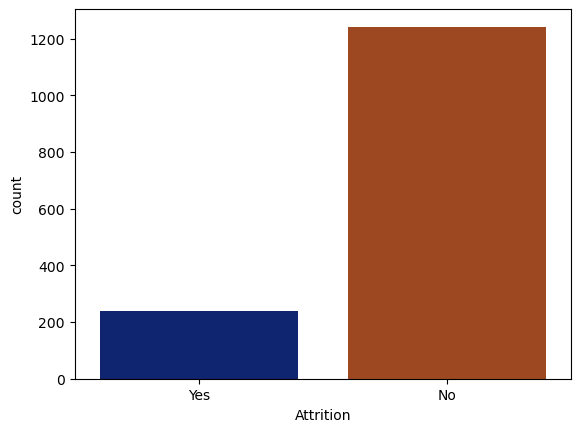

In [21]:
sns.countplot(x='Attrition',palette = 'dark', data=df)
plt.show()

##### Observation

The majority of employees (approximately 84%) have stayed with the company, while around 16% have left. This gives an overall attrition rate of 16%.

### Attrition distibution in Gender

**Let's see how Attrition is distributed in Gender**

In [22]:
df['Gender'].value_counts().to_frame()

,count
Gender,
Male,889
Female,591


##### We have more Male employees than Female employees

In [23]:
df.groupby(['Attrition', 'Gender']).size().to_frame()

0
Attrition Gender     
No        Female  504
          Male    738
Yes       Female   87
          Male    151

##### There is more Attrition rate in Male employees than Female employees

<Axes: xlabel='Gender', ylabel='count'>

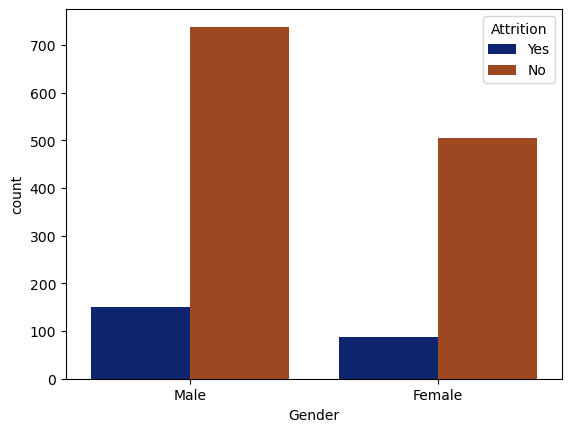

In [24]:
sns.countplot(x='Gender', hue='Attrition', palette = 'dark', data=df)

Both male and female employees experience attrition, but the absolute number of male employees who left is higher. 

### Attrition distibution in Age Group

**Let's see how attrition is distributed in the Age group**

In [46]:
df.groupby(['Attrition', 'AgeGroup']).size().unstack()

AgeGroup,18-25,26-35,36-45,46-55,55+
Attrition,,,,,
No,79,495,428,201,39
Yes,44,116,43,27,8


##### Getting the maximum count of attrition in the AgeGroup

In [43]:
# Group by 'Attrition' and 'AgeGroup' and calculate the size
grouped_counts = df.groupby(['Attrition', 'AgeGroup']).size()

# Find the index (i.e., 'AgeGroup') of the maximum count for each 'Attrition' category
max_count_idx = grouped_counts.groupby('Attrition').idxmax()

# Select the maximum counts using the identified indices
max_counts = grouped_counts.loc[max_count_idx]

In [27]:
max_counts.to_frame()

,,0
Attrition,AgeGroup,
No,26-35,495
Yes,26-35,116


<Axes: xlabel='AgeGroup', ylabel='count'>

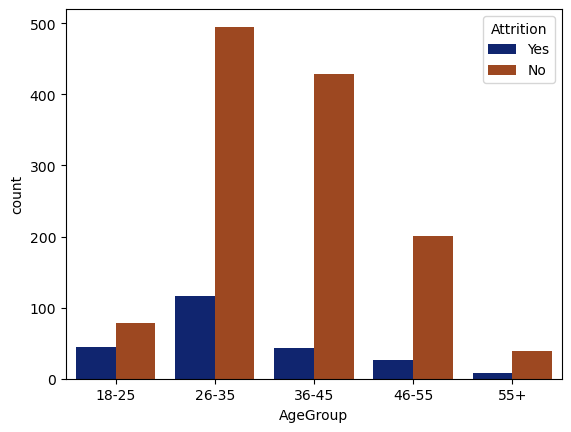

In [28]:
sns.countplot(x='AgeGroup',hue='Attrition', palette = 'dark', data=df)

##### From the above visual we can see that the attrition rate is higher within the *26-35* AgeGroup
This could be due to various factors such as career transitions, seeking better opportunities, or dissatisfaction.

### Attrition distibution in Marital Status

In [29]:
df['MaritalStatus'].value_counts().to_frame()

,count
MaritalStatus,
Married,679
Single,473
Divorced,328


<Axes: xlabel='MaritalStatus', ylabel='count'>

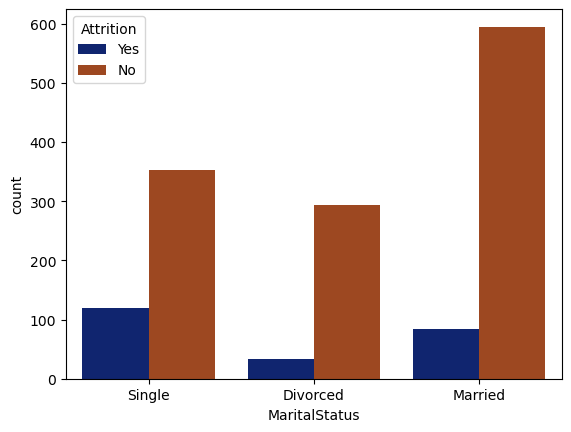

In [30]:
sns.countplot(x='MaritalStatus', hue='Attrition', palette = 'dark', data=df)

Marital status appears to be a significant factor in employee attrition. Single employees are more likely to leave the company compared to their married or divorced counterparts. This suggests that personal life stability, possibly associated with being married, might contribute to lower attrition rates. The company may consider focusing on supporting single employees, perhaps through work-life balance initiatives, to help reduce their attrition rate.

### Attrition distibution in Salary Slab

In [31]:
df['SalarySlab'].value_counts().to_frame()

,count
SalarySlab,
Upto 5k,753
5k-10k,444
10k-15k,150
15k+,133


In [47]:
df.groupby(['Attrition', 'SalarySlab']).size().unstack()

SalarySlab,10k-15k,15k+,5k-10k,Upto 5k
Attrition,,,,
No,129,128,395,590
Yes,21,5,49,163


<Axes: xlabel='SalarySlab', ylabel='count'>

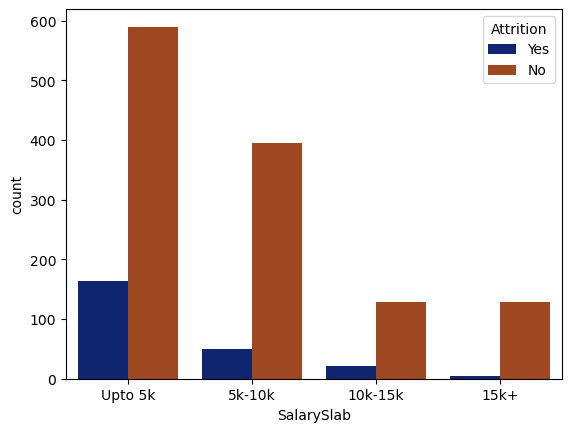

In [33]:
sns.countplot(x='SalarySlab',hue='Attrition', palette = 'dark', data=df)

##### Salary appears to be a significant factor in employee attrition. 
Lower salary slabs, particularly the "Upto 5k" group, are associated with higher attrition rates. As salaries increase, the likelihood of attrition decreases. 
- This suggests that employees may leave due to financial dissatisfaction, and offering competitive salaries could be a key strategy in reducing attrition. The company might consider reviewing compensation structures to ensure that they are competitive, especially for those in the lower salary brackets.

## Attrition distibution in OverTime

In [34]:
df['OverTime'].value_counts().to_frame()

,count
OverTime,
No,1062
Yes,418


In [49]:
df.groupby(['Attrition', 'OverTime']).size().to_frame()

0
Attrition OverTime     
No        No        952
          Yes       290
Yes       No        110
          Yes       128

<Axes: xlabel='OverTime', ylabel='count'>

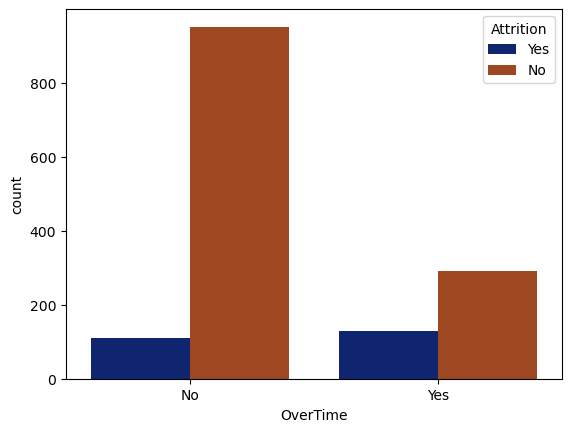

In [36]:
sns.countplot(x='OverTime',hue='Attrition', palette = 'dark', data=df)

Overtime appears to be a significant factor contributing to employee attrition. Employees who are required to work overtime are more likely to leave the company than those who do not work overtime. This suggests that reducing overtime or providing better support and compensation for employees who work overtime could help in reducing attrition rates.

### Correlation 
To analyze the relationship between Attrition and other numerical variables

Coverting necessary categorical columns to numeric

In [37]:
encoder = LabelEncoder()
df['encoded_attrition'] = encoder.fit_transform(df['Attrition'])

In [38]:
df['encoded_overtime'] = encoder.fit_transform(df['OverTime'])

In [39]:
selected_columns = ['encoded_attrition','encoded_overtime',  'DistanceFromHome', 'JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany']

correlation_matrix = df[selected_columns].corr()

In [40]:
correlation_matrix

,encoded_attrition,encoded_overtime,DistanceFromHome,JobSatisfaction,WorkLifeBalance,YearsAtCompany
encoded_attrition,1.000000,0.248331,0.080006,-0.104232,-0.062646,-0.135108
encoded_overtime,0.248331,1.000000,0.025652,0.023049,-0.025523,-0.012995
DistanceFromHome,0.080006,0.025652,1.000000,-0.004244,-0.030581,0.010111
JobSatisfaction,-0.104232,0.023049,-0.004244,1.000000,-0.017625,-0.001917
WorkLifeBalance,-0.062646,-0.025523,-0.030581,-0.017625,1.000000,0.009902
YearsAtCompany,-0.135108,-0.012995,0.010111,-0.001917,0.009902,1.000000


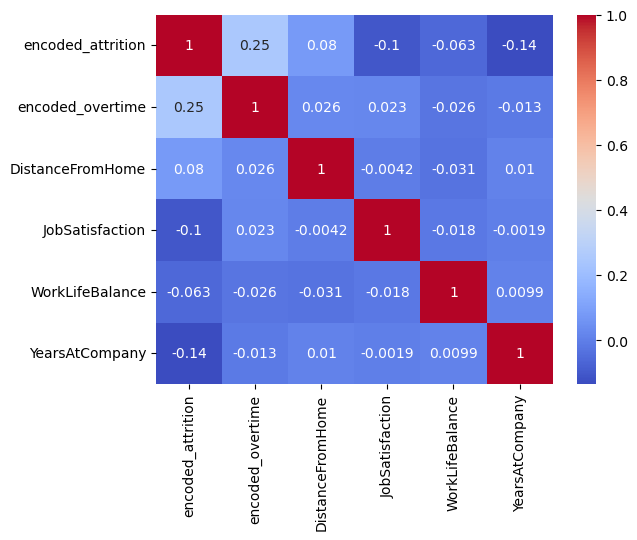

In [41]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


- The strongest correlation observed is between encoded_attrition and encoded_overtime (0.248), suggesting that employees who work overtime are more likely to leave, but even this relationship is weak.

- Other factors like DistanceFromHome, JobSatisfaction, and WorkLifeBalance show very weak correlations with Attrition, indicating that they might not be significant predictors of employee attrition in your dataset.

### Key factors

1. OverTime
2. SalarySlab
3. Marital Status
4. YearsAtCompany
5. JobSatisfaction